In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering  

In [2]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

# DENDROGRAMA 

Nos sirve para visualizar y elegir el corte posterior

In [3]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(X,X) 
print(dist_matrix, dist_matrix.shape)

[[0.         0.53851648 0.5        ... 1.48660687 1.1045361  0.94339811]
 [0.53851648 0.         0.28284271 ... 1.6        1.36014705 1.        ]
 [0.5        0.28284271 0.         ... 1.81107703 1.5132746  1.21655251]
 ...
 [1.48660687 1.6        1.81107703 ... 0.         0.5        0.6       ]
 [1.1045361  1.36014705 1.5132746  ... 0.5        0.         0.5       ]
 [0.94339811 1.         1.21655251 ... 0.6        0.5        0.        ]] (150, 150)


In [4]:
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)
Z = hierarchy.linkage(dist_matrix, 'complete')

In [13]:
Z

array([[  0.        ,  17.        ,   0.        ,   2.        ],
       [  9.        ,  34.        ,   0.        ,   2.        ],
       [  2.        ,  29.        ,   0.        ,   2.        ],
       [ 40.        ,  43.        ,   0.        ,   2.        ],
       [  7.        ,  26.        ,   0.        ,   2.        ],
       [  5.        ,  16.        ,   0.        ,   2.        ],
       [ 11.        ,  24.        ,   0.        ,   2.        ],
       [ 12.        ,  45.        ,   0.        ,   2.        ],
       [ 19.        ,  44.        ,   0.        ,   2.        ],
       [ 46.        , 158.        ,   0.        ,   3.        ],
       [ 20.        ,  31.        ,   0.        ,   2.        ],
       [ 66.        ,  88.        ,   0.        ,   2.        ],
       [ 55.        ,  99.        ,   0.        ,   2.        ],
       [ 67.        ,  82.        ,   0.        ,   2.        ],
       [101.        , 163.        ,   0.        ,   3.        ],
       [142.        , 164

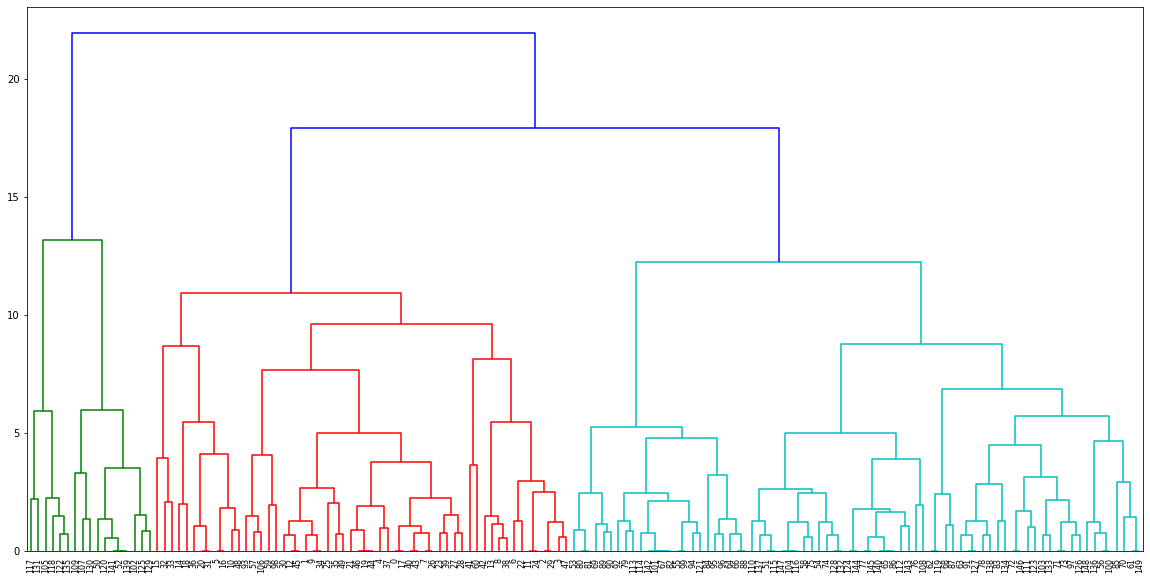

In [14]:
plt.figure(figsize=(20,10))
dendro = hierarchy.dendrogram(Z)
plt.tick_params(axis='x', labelsize=8)

In [15]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'average')
agglom.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [16]:
agglom.n_clusters_ 

3

In [17]:
agglom.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
df = pd.DataFrame()
df["a1"]= X[:,0]
df["a2"] = X[:,1]
df["clase"]=agglom.labels_

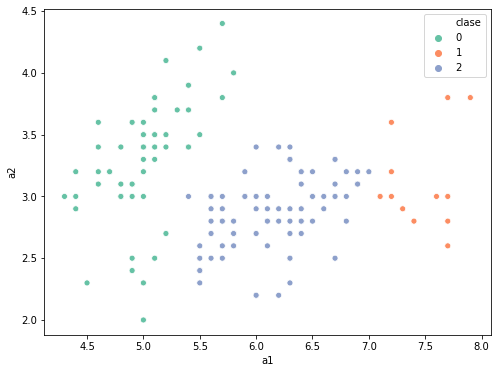

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(df["a1"],df["a2"],hue = df["clase"], palette="Set2")
plt.show()

In [20]:
agglom.n_leaves_

150